# Deep Learning Project : Cats and Dogs Classification

**The Dogs vs. Cats dataset is a standard computer vision dataset 
that involves classifying photos as either containing a dog or cat.**

1. The training contains 1,000 images of dogs and cats. 
2. Train your algorithm on these files and predict the labels (1 = dog, 0 = cat).

# 1. Import Python modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import pathlib

In [2]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout, Flatten,Activation, BatchNormalization,MaxPooling2D
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# 2. Load dataset

In [11]:
data_dir = pathlib.Path("/Users/surendra/ai_embed/animals/")
print(data_dir)
list(data_dir.glob('*/*.png'))[:5]

/Users/surendra/ai_embed/animals


[PosixPath('/Users/surendra/ai_embed/animals/cat/00013-4122619886.png'),
 PosixPath('/Users/surendra/ai_embed/animals/cat/00006-4122619879.png'),
 PosixPath('/Users/surendra/ai_embed/animals/cat/00436-200124746.png'),
 PosixPath('/Users/surendra/ai_embed/animals/cat/00077-200124387.png'),
 PosixPath('/Users/surendra/ai_embed/animals/cat/00457-200124767.png')]

In [31]:
dogs = list(data_dir.glob('Dog/*'))
dogs[:10]

[PosixPath('/Users/surendra/ai_embed/animals/Dog/00708-3846168870.png'),
 PosixPath('/Users/surendra/ai_embed/animals/Dog/00758-3846168920.png'),
 PosixPath('/Users/surendra/ai_embed/animals/Dog/00656-3846168818.png'),
 PosixPath('/Users/surendra/ai_embed/animals/Dog/00733-3846168895.png'),
 PosixPath('/Users/surendra/ai_embed/animals/Dog/00802-3846168964.png'),
 PosixPath('/Users/surendra/ai_embed/animals/Dog/00805-3846168967.png'),
 PosixPath('/Users/surendra/ai_embed/animals/Dog/00734-3846168896.png'),
 PosixPath('/Users/surendra/ai_embed/animals/Dog/00502-3846168664.png'),
 PosixPath('/Users/surendra/ai_embed/animals/Dog/00920-3846169082.png'),
 PosixPath('/Users/surendra/ai_embed/animals/Dog/00797-3846168959.png')]

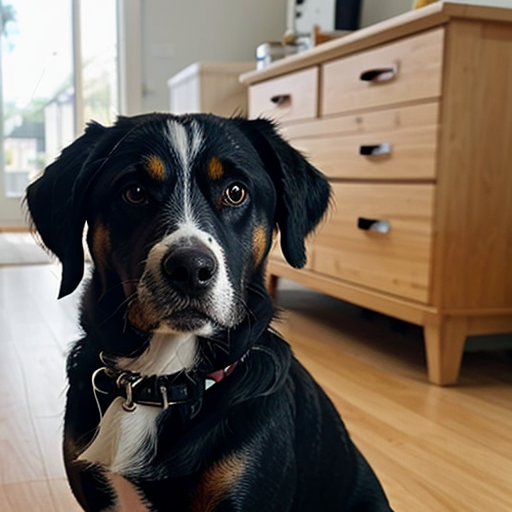

In [13]:
PIL.Image.open(str(dogs[1]))

In [14]:
cats = list(data_dir.glob('Cat/*'))
cats[:5]

[PosixPath('/Users/surendra/ai_embed/animals/Cat/00013-4122619886.png'),
 PosixPath('/Users/surendra/ai_embed/animals/Cat/00006-4122619879.png'),
 PosixPath('/Users/surendra/ai_embed/animals/Cat/00436-200124746.png'),
 PosixPath('/Users/surendra/ai_embed/animals/Cat/00077-200124387.png'),
 PosixPath('/Users/surendra/ai_embed/animals/Cat/00457-200124767.png')]

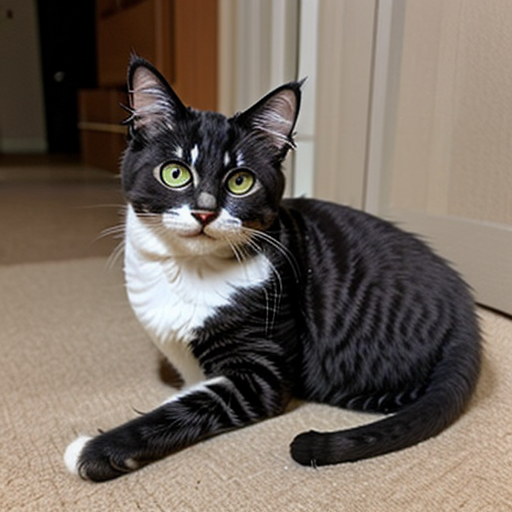

In [15]:
PIL.Image.open(str(cats[1]))

In [17]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

1000



# 3. Read Pets images from disk into numpy array using opencv

In [18]:
pet_images_dict = {
    'cats': list(data_dir.glob('Cat/*')),
    'dogs': list(data_dir.glob('Dog/*')),
}

pet_labels_dict = {
    'cats': 0,
    'dogs': 1,
}

In [19]:
pet_images_dict['dogs'][:5]

[PosixPath('/Users/surendra/ai_embed/animals/Dog/00708-3846168870.png'),
 PosixPath('/Users/surendra/ai_embed/animals/Dog/00758-3846168920.png'),
 PosixPath('/Users/surendra/ai_embed/animals/Dog/00656-3846168818.png'),
 PosixPath('/Users/surendra/ai_embed/animals/Dog/00733-3846168895.png'),
 PosixPath('/Users/surendra/ai_embed/animals/Dog/00802-3846168964.png')]

In [20]:
pet_images_dict['cats'][:5]

[PosixPath('/Users/surendra/ai_embed/animals/Cat/00013-4122619886.png'),
 PosixPath('/Users/surendra/ai_embed/animals/Cat/00006-4122619879.png'),
 PosixPath('/Users/surendra/ai_embed/animals/Cat/00436-200124746.png'),
 PosixPath('/Users/surendra/ai_embed/animals/Cat/00077-200124387.png'),
 PosixPath('/Users/surendra/ai_embed/animals/Cat/00457-200124767.png')]

In [21]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
X, Y = [], []

for pet_name, images in pet_images_dict.items():
    print(pet_name)
    for image in images:
        img = cv2.imread(str(image))
        if isinstance(img,type(None)):
            #print('image not found')
            continue

        elif ((img.shape[0] >= IMAGE_HEIGHT) and  (img.shape[1] >=IMAGE_WIDTH)):
            resized_img = cv2.resize(img,(IMAGE_WIDTH,IMAGE_HEIGHT))
            X.append(resized_img)
            Y.append(pet_labels_dict[pet_name])
        else:
            #print("Invalid Image")
            continue

cats
dogs


In [22]:
X = np.array(X)
Y = np.array(Y)

# 4. Train Test split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
print(len(X_train),len(Y_train))
print(len(X_test),len(Y_test))

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)



750 750
250 250
(750, 128, 128, 3) (750,)
(250, 128, 128, 3) (250,)



# 5. Build convolutional neural network and train it

In [24]:
IMAGE_CHANNELS=3
model = Sequential([

Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Conv2D(64, (3, 3), activation='relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Conv2D(128, (3, 3), activation='relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Flatten(),
Dense(512, activation='relu'),
BatchNormalization(),
Dropout(0.5),
Dense(1, activation='sigmoid'), # 2 because we have cat and dog classes
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,942,273 (49.37 MB)

 Trainable params: 12,940,801 (49.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [25]:
history=model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 338ms/step - accuracy: 0.7137 - loss: 0.8216
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 343ms/step - accuracy: 0.9182 - loss: 0.2353
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 343ms/step - accuracy: 0.9694 - loss: 0.0915
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 343ms/step - accuracy: 0.9830 - loss: 0.0571
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 348ms/step - accuracy: 0.9871 - loss: 0.0327
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 345ms/step - accuracy: 0.9882 - loss: 0.0362
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 347ms/step - accuracy: 0.9946 - loss: 0.0186
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 339ms/step - accuracy: 0.9904 - loss: 0.0380
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 343ms/step - accuracy: 0.9869 - loss: 0.0287
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 349ms/step - accuracy: 0.9804 - loss: 0.0480


In [26]:
model.evaluate(X_test,Y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.8413 - loss: 0.4639


[0.4628222584724426, 0.8360000252723694]

In [27]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = model.predict(X_test)
y_pred_classes = [0 if element < 0.5 else 1 for element in y_pred]

print("Classification Report: \n", classification_report(Y_test, y_pred_classes))

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      1.00      0.86       121
           1       1.00      0.68      0.81       129

    accuracy                           0.84       250
   macro avg       0.87      0.84      0.83       250
weighted avg       0.88      0.84      0.83       250



# 6. Evaluate the model

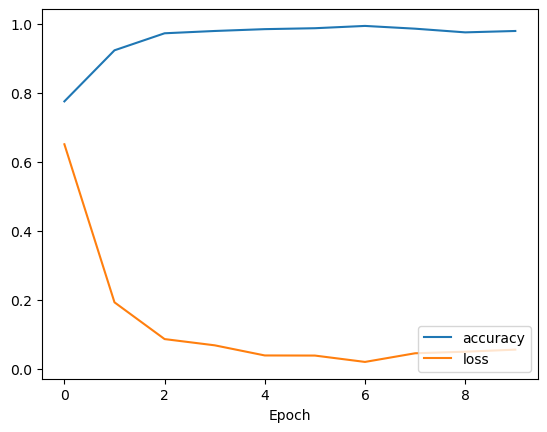

In [28]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

# 7.Predict

[PosixPath('/Users/surendra/ai_embed/animals/cat/00013-4122619886.png'),
 PosixPath('/Users/surendra/ai_embed/animals/cat/00006-4122619879.png'),
 PosixPath('/Users/surendra/ai_embed/animals/cat/00436-200124746.png'),
 PosixPath('/Users/surendra/ai_embed/animals/cat/00077-200124387.png'),
 PosixPath('/Users/surendra/ai_embed/animals/cat/00457-200124767.png')]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[3.2047594e-06]]
class: 0 name= cat


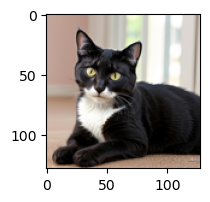

In [30]:
classes = ["cat","dog"]
from PIL import Image
fileImage = Image.open("/Users/surendra/ai_embed/animals/cat/00013-4122619886.png").convert("RGB").resize([IMAGE_WIDTH,IMAGE_HEIGHT])
image = np.array(fileImage)
myimage = image.reshape(1, IMAGE_WIDTH,IMAGE_HEIGHT,3)
# prepare pixel data
#myimage = myimage.astype('float32')
#myimage = myimage/255.
plt.figure(figsize = (4,2))
plt.imshow(image)

my_predicted_image = model.predict(myimage)
print(my_predicted_image)
if (my_predicted_image < 0.40):
    y_class=0
else:
    y_class=1
print("class:",y_class,"name=",classes[y_class])

# 8.Summary
1. With CNN, at the end 10 epochs, train accuracy was at around 92%,test accuracy 84%
